In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from dataset import UCRDataset
from utils import get_model_and_hyperparams
import numpy as np

In [2]:
def to_np(tensor):
   return tensor.squeeze().cpu().detach().numpy()

def plot_patches(patch1, patch2):
    """
    method to compare two patches
    input: patch1 and patch2 as tensor
    """
    f, a = plt.subplots()
    a.plot(to_np(patch1))
    a.plot(to_np(patch2))
    return f, a

def plot_encodings(patch1, patch2):
    """
    method to compare two patch encodings
    input: patch1 and patch2 as tensor
    """
    f, a = plt.subplots()
    a.hlines(y=to_np(vae.encode(patch1)), xmin=np.arange(n_latent), xmax=np.arange(n_latent)+1)
    a.hlines(y=to_np(vae.encode(patch2)), xmin=np.arange(n_latent), xmax=np.arange(n_latent)+1, colors='orange')
    return f, a

In [3]:
vae, params = get_model_and_hyperparams("fc")
n_latent = params.n_latent

train_set = UCRDataset(params.dataset, "train", patch_len=params.patch_len, normalize=params.normalize, norm_method=params.norm_method)
patches = train_set.x

/Users/work/PycharmProjects/thesis


In [4]:
data = pd.read_csv('distances.csv').loc[:, ['combination', 'hamming', 'l2']]

In [5]:
print(f"0.2 quantile: {data.l2.quantile(0.2)}")
print(f"0.8 quantile: {data.l2.quantile(0.8)}")


0.2 quantile: 0.799533884
0.8 quantile: 7.7573693200000005


**lower left corner**

In [6]:
data.loc[(data.hamming <= 0.05) & (data.l2 <= 1)]

,combination,hamming,l2
13,"(0, 14)",0.00,0.011727
27,"(0, 28)",0.00,0.022467
41,"(0, 42)",0.00,0.015431
55,"(0, 56)",0.00,0.009615
69,"(0, 70)",0.00,0.012644
...,...,...,...
317970,"(789, 793)",0.03,0.437111
317975,"(790, 791)",0.01,0.210089
317978,"(790, 794)",0.04,0.879175
317982,"(791, 792)",0.05,0.538527


(<Figure size 640x480 with 1 Axes>, <Axes: >)

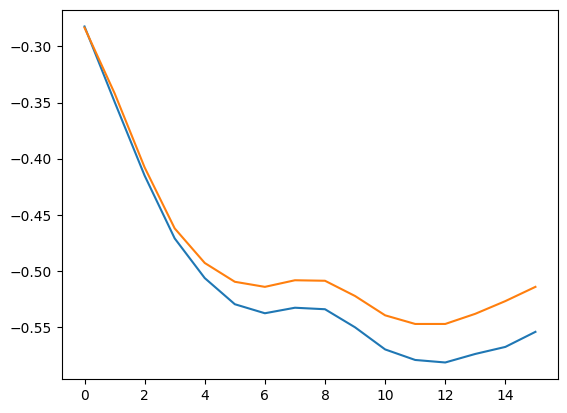

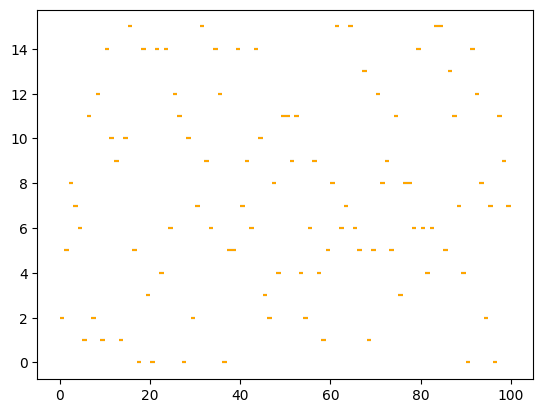

In [7]:
first = patches[107]
second = patches[9]

plot_patches(first, second)
plot_encodings(first, second)

**lower right corner**

In [8]:
data.loc[(data.hamming > 0.9) & (data.l2 < 3)]

,combination,hamming,l2
799,"(1, 4)",0.98,2.554807
800,"(1, 5)",0.97,2.370521
801,"(1, 6)",0.95,1.950836
802,"(1, 7)",0.95,1.873280
803,"(1, 8)",0.95,1.540654
...,...,...,...
317932,"(785, 793)",0.97,2.377640
317933,"(785, 794)",0.95,1.833267
317966,"(788, 797)",0.92,2.555343
317974,"(789, 797)",0.94,2.845403


(<Figure size 640x480 with 1 Axes>, <Axes: >)

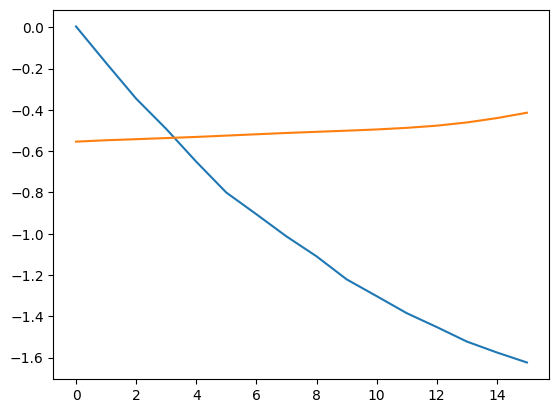

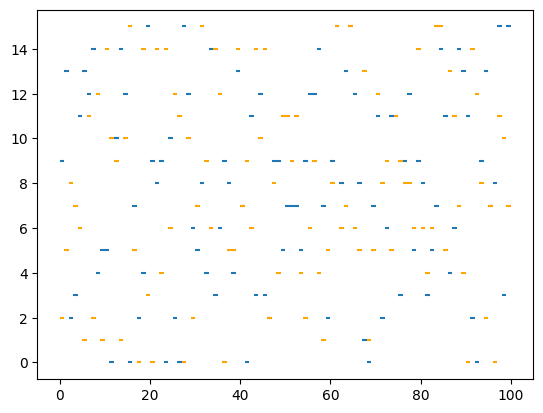

In [9]:
first = patches[13]
second = patches[467]

plot_patches(first, second)
plot_encodings(first, second)

**upper right corner**

In [10]:
data.loc[(data.hamming > 0.9) & (data.l2 > 10)]

,combination,hamming,l2
3189,"(4, 12)",0.99,10.339100
3203,"(4, 26)",0.99,10.307218
3217,"(4, 40)",0.99,10.294723
3231,"(4, 54)",0.99,10.379603
3245,"(4, 68)",0.99,10.382492
...,...,...,...
317910,"(783, 796)",0.93,11.454934
317965,"(788, 796)",0.99,10.229992
317973,"(789, 796)",0.99,10.125850
318001,"(795, 797)",0.96,11.931163


(<Figure size 640x480 with 1 Axes>, <Axes: >)

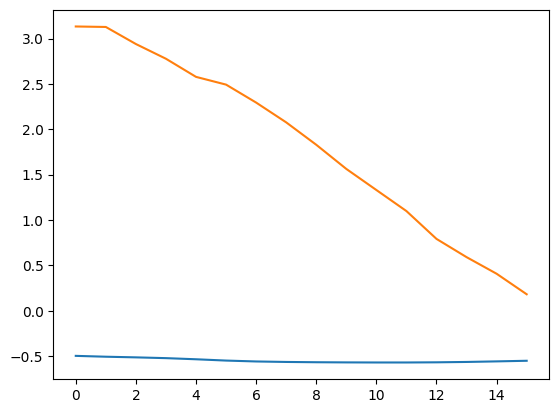

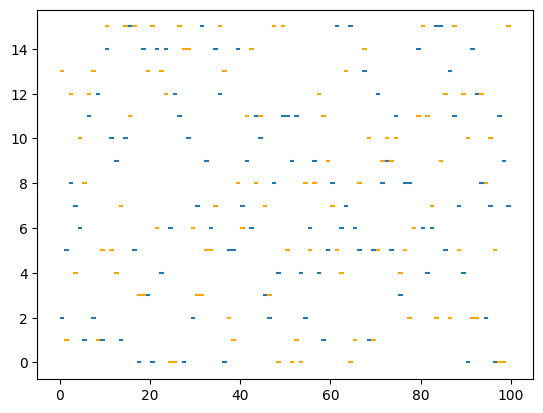

In [11]:
first = patches[88]
second = patches[796]

plot_patches(first, second)
plot_encodings(first, second)

**hamming = 0.2**

In [12]:
data.loc[(data.hamming == 0.2)]

,combination,hamming,l2
3185,"(4, 8)",0.2,1.045264
3201,"(4, 24)",0.2,1.489081
3215,"(4, 38)",0.2,1.483625
3227,"(4, 50)",0.2,1.041988
3241,"(4, 64)",0.2,1.035405
...,...,...,...
317528,"(766, 788)",0.2,1.367745
317732,"(774, 780)",0.2,1.374624
317746,"(774, 794)",0.2,1.372837
317857,"(780, 788)",0.2,1.375676


(<Figure size 640x480 with 1 Axes>, <Axes: >)

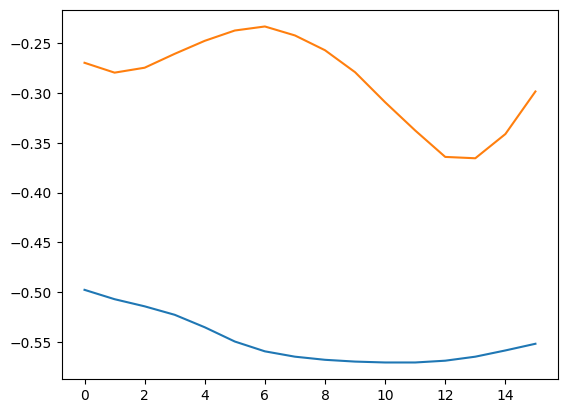

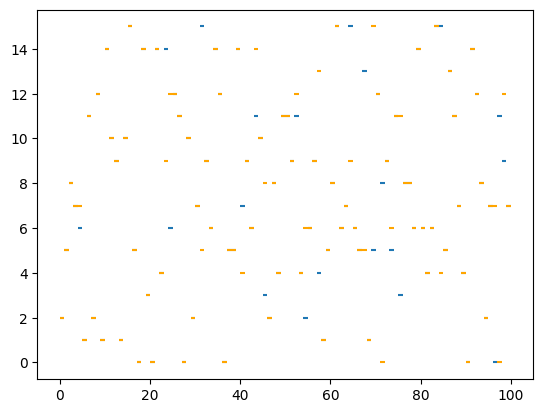

In [13]:
first = patches[88]
second = patches[792]

plot_patches(first, second)
plot_encodings(first, second)